### Importação dos dados



In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [4]:
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['loja', 'loja2', 'loja3', 'loja4']
faturamento = []

faturamento = [float(store['Preço'].sum()) for store in lojas]
faturamento

[1534509.12, 1488459.06, 1464025.03, 1384497.58]

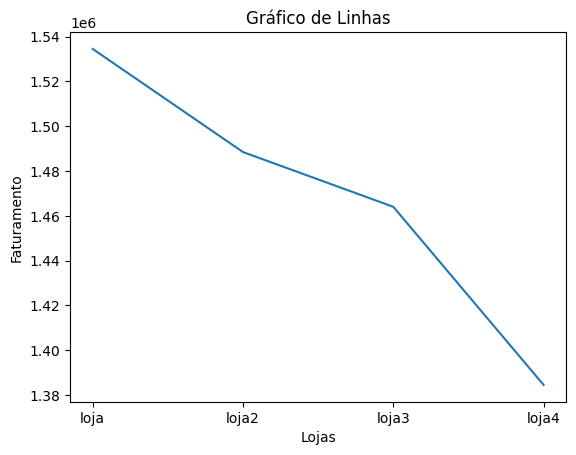

In [5]:
x = nomes_lojas
y = faturamento

plt.plot(x, y)
plt.title("Gráfico de Linhas")
plt.xlabel("Lojas")
plt.ylabel("Faturamento")
plt.show()

# 2. Vendas por Categoria


In [6]:
categorias = list(set(loja['Categoria do Produto']))
vendas_categorias = []

for nomes, loja, categoria in zip(nomes_lojas, lojas, categorias):
    print(f'Categorias mais populares em {nomes}:')
    categorias_vendas = loja['Categoria do Produto'].value_counts()
    print(categorias_vendas)

Categorias mais populares em loja:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64
Categorias mais populares em loja2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64
Categorias mais populares em loja3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64
Categorias mais populares em loja4:
Categoria do Produto

# 3. Média de Avaliação das Lojas

In [25]:
avaliacao_media = [loja['Avaliação da compra'].mean() for loja in lojas]
print(avaliacao_media)

[np.float64(3.976685036032217), np.float64(4.037303942348453), np.float64(4.048325561678677), np.float64(3.9957591178965224)]


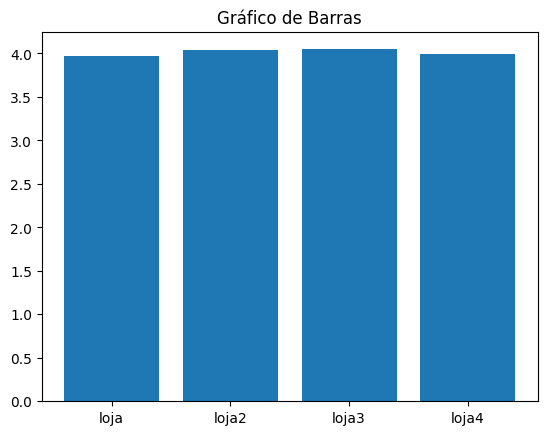

In [8]:

plt.bar(nomes_lojas, avaliacao_media)
plt.title("Gráfico de Barras")
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [12]:

try:
    # Lendo os dados de cada loja
    loja1 = pd.read_csv(url)
    loja2 = pd.read_csv(url2)
    loja3 = pd.read_csv(url3)
    loja4 = pd.read_csv(url4)

    lojas = [loja1, loja2, loja3, loja4]
    nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

    results = {}

    # Identificando o produto mais e menos vendido de cada loja
    for nome, df in zip(nomes_lojas, lojas):
        product_counts = df['Produto'].value_counts()
        most_sold = product_counts.idxmax()
        least_sold = product_counts.idxmin()
        results[nome] = {
            'most_sold': most_sold,
            'least_sold': least_sold,
            'counts': product_counts
        }

    # Imprimindo os resultados
    for nome, data in results.items():
        print(f"--- {nome} ---")
        print(f"Produto mais vendido: {data['most_sold']}")
        print(f"Produto menos vendido: {data['least_sold']}")
        print("\n")


except Exception as e:
    print(f"Ocorreu um erro ao carregar os dados: {e}")
    print("Por favor, verifique se as URLs estão corretas e se há conexão com a internet.")

--- Loja 1 ---
Produto mais vendido: Micro-ondas
Produto menos vendido: Headset


--- Loja 2 ---
Produto mais vendido: Iniciando em programação
Produto menos vendido: Jogo de tabuleiro


--- Loja 3 ---
Produto mais vendido: Kit banquetas
Produto menos vendido: Blocos de montar


--- Loja 4 ---
Produto mais vendido: Cama box
Produto menos vendido: Guitarra




# 5. Frete Médio por Loja


In [ ]:
try:
    # Lendo os dados de cada loja
    loja1 = pd.read_csv(url)
    loja2 = pd.read_csv(url2)
    loja3 = pd.read_csv(url3)
    loja4 = pd.read_csv(url4)

    lojas = [loja1, loja2, loja3, loja4]
    nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

    custos_medios_frete = {}

    # Calculando o custo médio de frete para cada loja
    for nome, df in zip(nomes_lojas, lojas):
        custo_medio = df['Frete'].mean()
        custos_medios_frete[nome] = custo_medio

    # Imprimindo os resultados
    print("--- Custo Médio de Frete por Loja ---")
    for nome, custo in custos_medios_frete.items():
        print(f"{nome}: R$ {custo:.2f}") # Formatando para duas casas decimais
    print("\n")

except Exception as e:
    print(f"Ocorreu um erro ao carregar os dados ou calcular o frete: {e}")
    print("Por favor, verifique se as URLs estão corretas e se há conexão com a internet.")

--- Custo Médio de Frete por Loja ---
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28




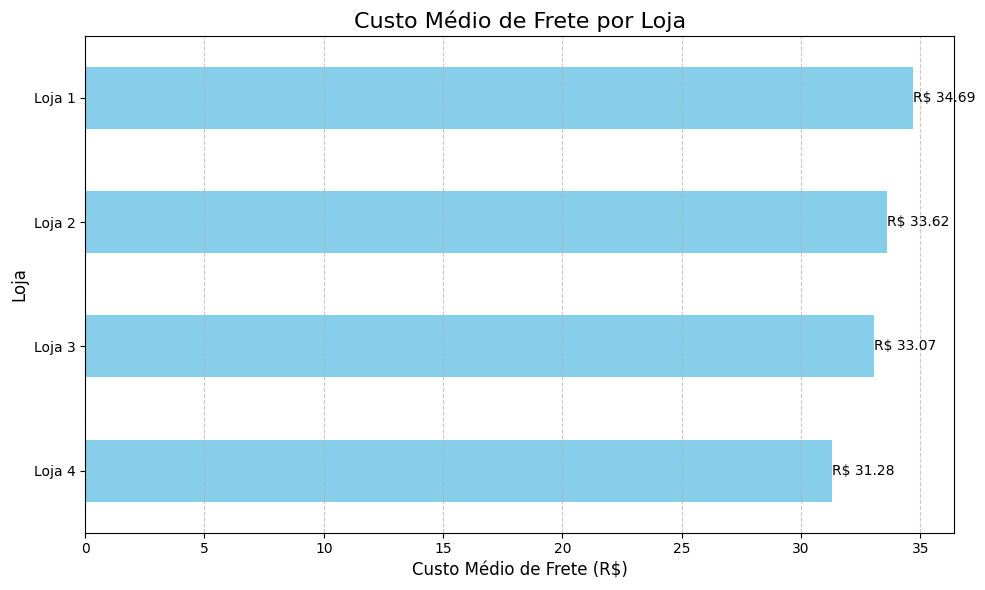

In [16]:
try:
    # --- Criação do Gráfico de Barras Horizontais ---
    # Convertendo o dicionário para uma Series do Pandas para facilitar o plot
    frete_series = pd.Series(custos_medios_frete)

    plt.figure(figsize=(10, 6)) # Define o tamanho da figura
    frete_series.sort_values().plot(kind='barh', color='skyblue') # Plota como barra horizontal e ordena

    plt.title('Custo Médio de Frete por Loja', fontsize=16)
    plt.xlabel('Custo Médio de Frete (R$)', fontsize=12) # Eixo X agora é o custo
    plt.ylabel('Loja', fontsize=12) # Eixo Y agora são as lojas

    # Adicionar os valores nas barras para melhor leitura
    for index, value in enumerate(frete_series.sort_values()):
        plt.text(value, index, f'R$ {value:.2f}', va='center') # Adiciona o texto do valor na barra

    plt.grid(axis='x', linestyle='--', alpha=0.7) # Grade no eixo X para facilitar a leitura dos valores
    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.savefig('custo_medio_frete_todas_lojas.png') # Salva o gráfico
    plt.show() # Mostra o gráfico

except Exception as e:
    print(f"Ocorreu um erro ao gerar gráfico: {e}")

# 📊 Relatório Final: Recomendação de Loja para Venda

## 🧾 Introdução

Este relatório visa identificar a loja mais adequada para venda com base em uma análise aprofundada de seu desempenho. Avaliamos os seguintes aspectos:

- Faturamento  
- Popularidade de categorias de produtos  
- Satisfação do cliente  
- Produtos mais e menos vendidos  
- Custos de frete  

Nosso objetivo é fornecer uma **recomendação clara e justificada** para apoiar a decisão de venda.

---

## 📈 Análise dos Dados

### 💰 Faturamento Total

O faturamento é o principal indicador financeiro:

- **Loja 1**: R$ 1.534.509,12  
- **Loja 2**: R$ 1.488.459,06  
- **Loja 3**: R$ 1.464.025,03  
- **Loja 4**: R$ 1.384.497,58  

➡️ A **Loja 1** lidera o faturamento, mostrando a maior capacidade de geração de receita. A **Loja 4**, por outro lado, apresenta o menor desempenho financeiro.

---

### 📦 Categorias de Produtos Mais Populares

As categorias **"Móveis"**, **"Eletrônicos"** e **"Brinquedos"** são consistentemente as mais vendidas em todas as lojas, refletindo forte demanda de mercado. As menos populares são **"Instrumentos Musicais"**, **"Livros"** e **"Utilidades Domésticas"**.

- **Loja 3** se destaca em **vendas de Móveis** (499 unidades).  
- **Loja 4** tem o maior volume em **Brinquedos** (338 unidades).

---

### ⭐ Média de Avaliação dos Clientes

A satisfação do cliente é um pilar da reputação:

- **Loja 1**: 3.98  
- **Loja 2**: 4.04  
- **Loja 3**: 4.05  
- **Loja 4**: 4.00  

➡️ Todas as lojas demonstram **excelente satisfação do cliente**, com médias muito próximas e acima de 3.9. **Loja 3** e **Loja 2** registram avaliações ligeiramente superiores.

---

### 🛒 Produtos Mais e Menos Vendidos

A performance individual dos produtos varia:

| Loja   | Mais Vendido              | Menos Vendido           |
|--------|---------------------------|--------------------------|
| Loja 1 | Micro-ondas               | Headset                  |
| Loja 2 | Iniciando em programação  | Jogo de tabuleiro        |
| Loja 3 | Kit banquetas             | Blocos de montar         |
| Loja 4 | Cama box                  | Guitarra                 |

➡️ Esses dados mostram as **especificidades de demanda** de cada unidade.

---

### 🚚 Custo Médio de Frete

O frete impacta diretamente a margem de lucro:

- **Loja 1**: R$ 34,69  
- **Loja 2**: R$ 33,62  
- **Loja 3**: R$ 33,07  
- **Loja 4**: R$ 31,28  

➡️ A **Loja 4** se destaca com o menor custo médio de frete, indicando maior eficiência logística. Já a **Loja 1**, apesar do alto faturamento, possui o frete mais elevado.

---

## ✅ Conclusão e Recomendação

Com base em nossa análise, **a Loja 1 é a candidata mais indicada para venda**.

### 🧾 Justificativa:

- **🏆 Liderança de Faturamento**  
  A Loja 1 é a que consistentemente gera a maior receita, um fator crucial para qualquer comprador em potencial. Seu faturamento a posiciona como a de maior valor intrínseco no momento da venda.

- **👍 Alta Satisfação do Cliente**  
  Apesar de ter um faturamento expressivo, a Loja 1 mantém uma excelente média de avaliação (**3.98**). Isso demonstra que o volume de vendas **não comprometeu a qualidade do serviço** ou a satisfação do cliente, ponto positivo para a reputação e sustentabilidade do negócio.

- **📦 Potencial de Otimização**  
  O custo médio de frete mais alto pode ser uma **oportunidade de melhoria**. Há espaço para otimizar a logística, **reduzindo custos e aumentando a lucratividade**, sem a necessidade de ampliar o já robusto faturamento.

---

Embora outras lojas apresentem pontos fortes — como o frete mais baixo da Loja 4 —, o **faturamento superior da Loja 1 a torna inegavelmente a opção mais atraente** do ponto de vista financeiro. Com a possibilidade de otimizar o frete, **seu potencial de valorização é ainda maior**.
